<a href="https://colab.research.google.com/github/isimanufatura/Vibsnake/blob/main/Leitura_aquisicoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

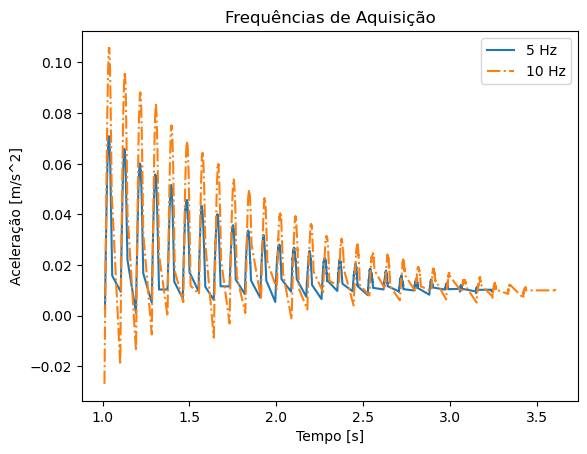

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def valeria():
    print('oi')

if __name__ == "__main__":

    linestyles = ['-', '--', '-.', ':']
   # frequencias = [5, 10, 20, 30, 40, 60, 100]
    frequencias = [5, 10]

    files = [f"..\Exp_data\Aquisição somente acelerômetro(Link6)\Acelerômetro_{i}Hz_1.lvm" for i in frequencias]

    syscoor = ["+", "+", "+", "+"]
    data = pd.DataFrame([])
    time = np.arange(0,24,0.012)
    last_values = 0
    to_debug = []

    f, ax = plt.subplots(1)

    for idx, (file) in enumerate(files):

        ls = random.choice(linestyles)

        aux = pd.read_csv(file, sep='\s+', skiprows=22, decimal=",")

        dados = aux.drop(columns=['Comment']) #exclusão da coluna de comentários

        # Cortando os dados de forma arbitrária (após 1s)
        dados_certos = dados[dados['X_Value'] > 1.0]

        ax.plot(dados_certos['X_Value'], dados_certos['Acceleration'],
                linestyle = ls, label= f"{frequencias[idx]} Hz")

    ax.set_title("Frequências de Aquisição")
    ax.set_ylabel("Aceleração [m/s^2]")
    ax.set_xlabel("Tempo [s]")
    plt.legend()